### Question 1
Task: Find out the optimal number of latent factors respectively for 

Basic Matrix Factorization (PMF),

SVD (adding biases),

and SVD++ (adding implicit feedback).

Set the number of iterations in SGD to be 30.

(a) Use 3-fold cross-validation to evaluate PMF, SVD and SVD++ with different
number of latent factors (n_factors = 60, 80, 100);

(b) Summarize all the results in a table or figure and briefly describe them.

### (a)

In [1]:
import timeit

In [2]:
from surprise import Dataset
from surprise.model_selection import train_test_split
import pandas as pd
from surprise import SVD
from surprise import SVDpp
from surprise import BaselineOnly
from surprise import accuracy

from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the dataset
import pandas as pd
from surprise import Reader
from surprise import Dataset

reader = Reader(rating_scale = (-10,10))
data_df=pd.read_csv('./jester_sampled_rating.csv')
whole_data = Dataset.load_from_df(data_df, reader=reader)

In [4]:
result_list = []
def store_result(cur_result_list, i_method, i_n_factors, i_n_epochs, i_RMSE, i_time):
    new_result={
        'method': i_method,
        'n_factors': int(i_n_factors),
        'n_epochs': int(i_n_epochs),
        'RMSE': i_RMSE,
        'run_time': i_time
    }
    cur_result_list.append(new_result)
    
    return cur_result_list

### Basic Matrix Factorization (Probabilistic MF)

In [5]:
n_factors_list =[60, 80, 100]
n_epochs_list = [30]

method = "SVD-basicMF"
mean_list_SVD_MF = []
for n_factor in n_factors_list:
    print("number of factor is:" , n_factor)
    for n_epoch in n_epochs_list:
        
        start = timeit.default_timer()

        # use the famous SVD algorithm.
        algo = SVD(n_factors=n_factor, n_epochs=n_epoch, biased=False)

        results = cross_validate(algo, whole_data, measures=['RMSE'], cv=3, verbose=True)


        stop = timeit.default_timer()
        run_time = stop - start
        print('Run Time:',run_time)

        mean_rmse = results['test_rmse'].mean()
        mean_list_SVD_MF.append(mean_rmse)

        result_list = store_result(result_list, method, n_factor, n_epoch, mean_rmse, run_time)

number of factor is: 60
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    4.6886  4.7144  4.7056  4.7029  0.0107  
Fit time          7.79    7.94    7.74    7.82    0.09    
Test time         0.46    0.49    0.55    0.50    0.04    
Run Time: 25.689251499999983
number of factor is: 80
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    4.5106  4.4779  4.4556  4.4813  0.0226  
Fit time          9.04    9.40    9.16    9.20    0.15    
Test time         0.43    0.52    0.58    0.51    0.06    
Run Time: 29.89176999999998
number of factor is: 100
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    4.3035  4.3048  4.3184  4.3089  0.0067  
Fit time          11.48   11.15   11.01   11.22   0.20    
Test time         0.41    0.51    0.54    0.49    0.05    
Run Time: 35.82

In [6]:
mean_list_SVD_MF

[4.702862779580592, 4.481347564107998, 4.308932906229771]

### SVD (adding biases)

In [7]:
n_factors_list =[60, 80, 100]
n_epochs_list = [30]

method = "SVD"
mean_list_SVD = []
for n_factor in n_factors_list:
    print("number of factor is:" , n_factor)
    for n_epoch in n_epochs_list:
        
        start = timeit.default_timer()

        algo = SVD(n_factors=n_factor, n_epochs=n_epoch, biased=True)

        results = cross_validate(algo, whole_data, measures=['RMSE'], cv=3, verbose=True)


        stop = timeit.default_timer()
        run_time = stop - start
        print('Run Time:',run_time)

        mean_rmse = results['test_rmse'].mean()
        mean_list_SVD.append(mean_rmse)

        result_list = store_result(result_list, method, n_factor, n_epoch, mean_rmse, run_time)

number of factor is: 60
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    4.6921  4.7140  4.7044  4.7035  0.0089  
Fit time          8.13    7.89    8.04    8.02    0.10    
Test time         0.44    0.58    0.52    0.52    0.06    
Run Time: 26.31738150000001
number of factor is: 80
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    4.4674  4.4973  4.4973  4.4873  0.0141  
Fit time          9.56    9.32    9.49    9.46    0.10    
Test time         0.57    0.44    0.50    0.51    0.05    
Run Time: 30.54463599999997
number of factor is: 100
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    4.3180  4.2812  4.2884  4.2959  0.0159  
Fit time          10.78   11.07   11.01   10.95   0.12    
Test time         0.63    0.48    0.64    0.58    0.07    
Run Time: 35.305

In [8]:
mean_list_SVD

[4.703489004572241, 4.487336290307634, 4.295867391419188]

### SVD++ (adding implicit feedback)

In [9]:
n_factors_list =[60, 80, 100]
n_epochs_list = [30]

method = "SVDpp"
mean_list_SVDpp = []
for n_factor in n_factors_list:
    print("number of factor is:" , n_factor)
    for n_epoch in n_epochs_list:
        
        start = timeit.default_timer()

        algo = SVDpp(n_factors=n_factor, n_epochs=n_epoch)

        results = cross_validate(algo, whole_data, measures=['RMSE'], cv=3, verbose=True)


        stop = timeit.default_timer()
        run_time = stop - start
        print('Run Time:',run_time)

        mean_rmse = results['test_rmse'].mean()
        mean_list_SVDpp.append(mean_rmse)

        result_list = store_result(result_list, method, n_factor, n_epoch, mean_rmse, run_time)

number of factor is: 60
Evaluating RMSE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    4.8424  4.8735  4.8846  4.8668  0.0179  
Fit time          307.77  307.51  315.00  310.10  3.47    
Test time         3.81    3.79    3.92    3.84    0.06    
Run Time: 942.5469207
number of factor is: 80
Evaluating RMSE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    4.5719  4.5500  4.5786  4.5668  0.0122  
Fit time          402.49  405.69  375.20  394.46  13.68   
Test time         4.38    3.76    3.82    3.99    0.28    
Run Time: 1196.1300132999997
number of factor is: 100
Evaluating RMSE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    4.3077  4.3143  4.3189  4.3136  0.0046  
Fit time          438.08  452.04  463.59  451.24  10.43   
Test time         3.64    3.67    3.77    3.69    0.06    
Run Time: 1365.

### (b)

In [10]:
result_df =pd.DataFrame.from_dict(result_list)
result_df.n_factors = result_df.n_factors.astype(str)

In [11]:
result_df

,method,n_factors,n_epochs,RMSE,run_time
0,SVD-basicMF,60,30,4.702863,25.689251
1,SVD-basicMF,80,30,4.481348,29.891770
2,SVD-basicMF,100,30,4.308933,35.821342
3,SVD,60,30,4.703489,26.317382
4,SVD,80,30,4.487336,30.544636
5,SVD,100,30,4.295867,35.305613
6,SVDpp,60,30,4.866837,942.546921
7,SVDpp,80,30,4.566837,1196.130013
8,SVDpp,100,30,4.313625,1365.444933


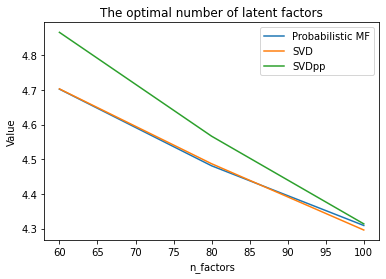

In [12]:
n_factors_list =[60, 80, 100]
plt.plot(n_factors_list,mean_list_SVD_MF,label='Probabilistic MF')
plt.plot(n_factors_list,mean_list_SVD,label='SVD')
plt.plot(n_factors_list,mean_list_SVDpp,label='SVDpp')

plt.title('The optimal number of latent factors')
plt.xlabel('n_factors')
plt.ylabel('Value')
plt.legend()
plt.show()

in general, We can see that by increasing the number of latent factors, the value of RMSE decreases and it means the algorithm is more accurate.
Also, SVD and Probabilistic MF, almost have the same RMSE in different numbers of latent factors, SVDpp has a higher RMSE at first, but in the end, it converged to the others. Run time of SVDpp is more than the other methods.

### Question 2 
Task: Conduct a comparison of the three matrix factorization-based methods (i.e., PMF,
SVD, SVD++), the centered item-based kNN (with means), and a baseline (of your
choice).

(a) Use Grid Search to search for the best parameter combination for each method
except the baseline. (You can feel free to set the parameters of your choice.);

(b) Use the 5-fold cross-validation to test the best combination for each method;

(c) Find out the best two methods based on the average of 5-fold cross-validation
results, and then compare these two methods’ results through Two-Sample t-
Test;

(d) Summarize all the results using table or figure, and briefly discuss them.

#### (a) We use: number of latent factors (n_factors=10, 20, 30) and number of iterations (n_epochs=10, 30, 50) and Grid Search (cv=3)

In [13]:
result_list = []
def store_result(cur_result_list, i_method, i_best_param,i_rmse, i_time):
    new_result={
        'method': i_method,
        'Best_patams': i_best_param,
        'RMSE':i_rmse,
        'run_time': i_time
    }
    cur_result_list.append(new_result)
    
    return cur_result_list

### PMF

In [14]:
start = timeit.default_timer()

# Load the movielens-100k dataset
method = "Probabilistic MF"
whole_data = Dataset.load_from_df(data_df, reader=reader)
data = whole_data

param_grid ={
        'n_factors': [10,20,30],
        'n_epochs': [10,30,50],
        'biased': [False],
}
stop = timeit.default_timer()
run_time = stop - start
PMF_gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
PMF_gs.fit(data)
PMF_based_algo = PMF_gs.best_estimator['rmse']

print(PMF_based_algo)

PMF_best_result = cross_validate(PMF_based_algo, data, measures=['RMSE'], cv=5, verbose=True)

Best_param = PMF_gs.best_params
mean_rmse = PMF_best_result['test_rmse'].mean()
result_list = store_result(result_list, method,Best_param,mean_rmse,run_time)
result_list

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.0853  4.0691  4.0637  4.0156  4.0195  4.0506  0.0280  
Fit time          1.45    1.46    1.46    1.47    1.45    1.46    0.01    
Test time         0.22    0.22    0.22    0.21    0.30    0.23    0.04    


[{'method': 'Probabilistic MF',
  'Best_patams': {'rmse': {'n_factors': 10, 'n_epochs': 10, 'biased': False}},
  'RMSE': 4.050629728007989,
  'run_time': 0.21625859999994645}]

### SVD

In [15]:
start = timeit.default_timer()

# Load the movielens-100k dataset
whole_data = Dataset.load_from_df(data_df, reader=reader)
data = whole_data
method = "SVD"
param_grid ={
        'n_factors': [10,20,30],
        'n_epochs': [10,30,50],
        'biased': [True],
}
stop = timeit.default_timer()
run_time = stop - start
SVD_gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
SVD_gs.fit(data)
SVD_based_algo = SVD_gs.best_estimator['rmse']

print(SVD_based_algo)

SVD_best_result = cross_validate(SVD_based_algo, data, measures=['RMSE'], cv=5, verbose=True)
Best_param = SVD_gs.best_params
mean_rmse = SVD_best_result['test_rmse'].mean()
result_list = store_result(result_list, method,Best_param,mean_rmse,run_time)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.0015  4.0629  4.1111  4.0715  4.0478  4.0590  0.0356  
Fit time          1.48    1.46    1.50    1.61    1.50    1.51    0.05    
Test time         0.35    0.27    0.31    0.34    0.28    0.31    0.03    


### SVDpp

In [16]:
start = timeit.default_timer()

# Load the movielens-100k dataset
whole_data = Dataset.load_from_df(data_df, reader=reader)
data = whole_data
method = "SVDpp"
param_grid ={
        'n_factors': [10,20,30],
        'n_epochs': [10,30,50],
}
stop = timeit.default_timer()
run_time = stop - start
SVDpp_gs = GridSearchCV(SVDpp, param_grid, measures=['rmse'], cv=3)
SVDpp_gs.fit(data)
SVDpp_based_algo = SVDpp_gs.best_estimator['rmse']
print(SVDpp_based_algo)
SVDpp_best_result = cross_validate(SVDpp_based_algo, data, measures=['RMSE'], cv=5, verbose=True)

Best_param = SVDpp_gs.best_params
mean_rmse = SVDpp_best_result['test_rmse'].mean()
result_list = store_result(result_list, method,Best_param,mean_rmse,run_time)

Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.1495  4.1058  4.0769  4.1123  4.1077  4.1104  0.0232  
Fit time          50.48   50.75   50.43   51.80   51.49   50.99   0.55    
Test time         2.53    2.55    2.71    2.57    2.54    2.58    0.07    


### centered item-based kNN (with means)

In [17]:
start = timeit.default_timer()

whole_data = Dataset.load_from_df(data_df, reader=reader)
data = whole_data
method = "Item based kNN"

param_grid = {'k': [10,20,30,50,90],
              'sim_options':{
                  'name': ['cosine','pearson'],
                  'user_based': [False]
                  }
             }
stop = timeit.default_timer()
run_time = stop - start

item_gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=3)
item_gs.fit(data)
item_based_algo = item_gs.best_estimator['rmse']
print(item_based_algo)
item_best_result = cross_validate(item_based_algo, data, measures=['RMSE'], cv=5, verbose=True)

Best_param = item_gs.best_params
mean_rmse = item_best_result['test_rmse'].mean()
result_list = store_result(result_list, method,Best_param,mean_rmse,run_time)

Computing the cosine similarity matrix...


C:\Users\Aysan\anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done c

### Baseline

In [18]:
from surprise import BaselineOnly

start = timeit.default_timer()

whole_data = Dataset.load_from_df(data_df, reader=reader)
data = whole_data

method = "Baseline"

# To use baseline estimate
algo = BaselineOnly()

results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)


stop = timeit.default_timer()
run_time = stop - start

mean_rmse = results['test_rmse'].mean()

result_list = store_result(result_list, method,-1,mean_rmse,run_time)


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.0954  4.1362  4.0359  4.1312  4.1227  4.1043  0.0370  
Fit time          0.18    0.20    0.20    0.19    0.21    0.20    0.01    
Test time         0.17    0.29    0.20    0.17    0.34    0.23    0.07    


In [19]:
result_df = pd.DataFrame.from_dict(result_list)
result_df

,method,Best_patams,RMSE,run_time
0,Probabilistic MF,"{'rmse': {'n_factors': 10, 'n_epochs': 10, 'bi...",4.050630,0.216259
1,SVD,"{'rmse': {'n_factors': 10, 'n_epochs': 10, 'bi...",4.058983,0.212548
2,SVDpp,"{'rmse': {'n_factors': 10, 'n_epochs': 10}}",4.110414,0.284542
3,Item based kNN,"{'rmse': {'k': 20, 'sim_options': {'name': 'co...",3.919092,0.340446
4,Baseline,-1,4.104293,3.444795


### T-test

In [20]:
from scipy.stats import ttest_ind

item_based_RMSE = item_best_result['test_rmse']
PMF_best_RMSE = PMF_best_result['test_rmse']

t_test_result = ttest_ind(item_based_RMSE,PMF_best_RMSE)
print(t_test_result)

Ttest_indResult(statistic=-7.951115005461734, pvalue=4.56368848223134e-05)


(0.9, 5.0)

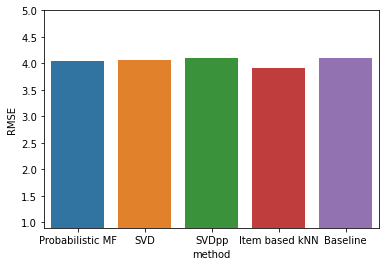

In [21]:
fig , ax  = plt.subplots()
sns.barplot(x ='method',y='RMSE' , data=result_df)
ax.set_ylim(0.9,5)

As is shown in the table and chart, The result of item-based KNN is better than the rest and other algorithms almost have close values. Also based on the table, MF, SVD, and SVDpp have their best params at n-factor =10 and n-epochs = 10. The run time of the algorithms is also shown in the table, and SVDpp has the longer running time in compare with the SVD and MF.